<font color=#00008b size=5 face="黑體">**載入基本 package**</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import sklearn

<font color=#00008b size=5 face="黑體">**資料讀取. 探索. 處理**</font>

### 資料六 | [Churn Modelling](https://www.kaggle.com/shrutimechlearn/churn-modelling)
**變數解釋**  
  
  
**預測變數**  
Exited (pos: 1 , neg: 0)  

In [5]:
shrutime_df = pd.read_csv('.\\data\\6.Churn_Modelling.csv').iloc[:, 2:]
print('shrutime_df:', shrutime_df.shape)

shrutime_df: (10000, 12)


In [6]:
## 資料修正
# remove the meaningless column
#del shrutime_df['Surname']

#replace values
shrutime_df["Exited"] = shrutime_df["Exited"].replace({1: "Yes", 0: "No"})
shrutime_df["HasCrCard"] = shrutime_df["HasCrCard"].replace({1: "Yes", 0: "No"})
shrutime_df["IsActiveMember"] = shrutime_df["IsActiveMember"].replace({1: "Yes", 0: "No"})

shrutime_df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes


In [ ]:
print(shrutime_df.Exited.value_counts())
print('\npos% :', shrutime_df.Exited.value_counts()[1]/len(shrutime_df.Exited))

In [8]:
# 資料基本描述
def data_explore(df):
    print("*Missing values :  ", df.isnull().sum().values.sum())
    print("*duplicate values :  ", df.duplicated().sum(), sep='')
    print("*Unique values & feature type : ")
    display(pd.DataFrame({'unique values':df.nunique(), 'feature type':df.dtypes}))

# 區分連續與量化資料
def split_data_by_feature_types(df):
    df_categorial, df_quantitative = [], []
    for col_name, types in zip(df.columns, df.dtypes):
        if types in ['object','bool']:
            df_categorial.append(col_name)
        else:
            df_quantitative.append(col_name)
    df_categorial = df[df_categorial]
    df_quantitative = df[df_quantitative]
    
    return df_categorial, df_quantitative

data_explore(shrutime_df)
shrutime_categorial, shrutime_quantitative = split_data_by_feature_types(shrutime_df)

*Missing values :   0
*duplicate values :  0
*Unique values & feature type : 


,unique values,feature type
Surname,2932,object
CreditScore,460,int64
Geography,3,object
Gender,2,object
Age,70,int64
Tenure,11,int64
Balance,6382,float64
NumOfProducts,4,int64
HasCrCard,2,object
IsActiveMember,2,object


In [7]:
# split data by the label
shrutime_pos = shrutime_df[shrutime_df["Exited"] == 'Yes']
shrutime_neg = shrutime_df[shrutime_df["Exited"] == 'No']

shrutime_df["Exited_n"] = shrutime_df["Exited"].map({'Yes':1, 'No':0})

<font color=#00008b size=5 face="黑體">**類別資料繪圖**</font>

In [ ]:
shrutime_categorial.columns

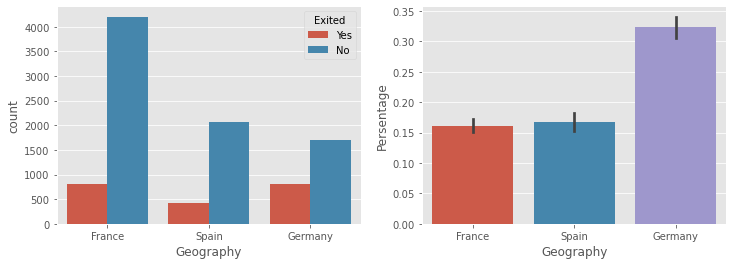

In [8]:
# 類別變數繪圖 (countplot, barplot) -- Geography: The country from which the customer belongs
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x='Geography', data=shrutime_df, hue="Exited", ax=axes[0])
ax2 = sns.barplot(x='Geography', y='Exited_n', data=shrutime_df, ax=axes[1])
ax2.set_ylabel('Persentage')
plt.show()

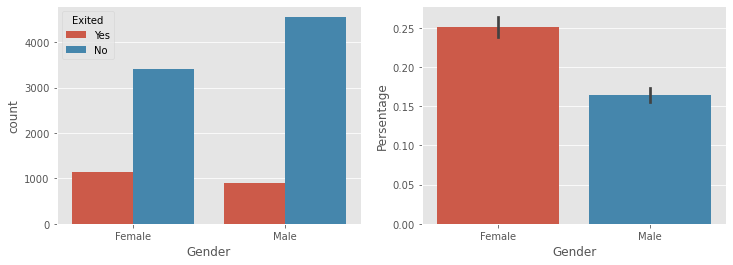

In [9]:
# 類別變數繪圖 (countplot, barplot) -- Gender
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x='Gender', data=shrutime_df, hue="Exited", ax=axes[0])
ax2 = sns.barplot(x='Gender', y='Exited_n', data=shrutime_df, ax=axes[1])
ax2.set_ylabel('Persentage')
plt.show()

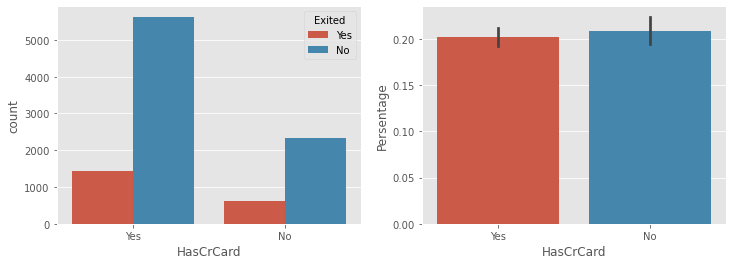

In [10]:
# 類別變數繪圖 (countplot, barplot) -- HasCrCard
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x='HasCrCard', data=shrutime_df, hue="Exited", ax=axes[0])
ax2 = sns.barplot(x='HasCrCard', y='Exited_n', data=shrutime_df, ax=axes[1])
ax2.set_ylabel('Persentage')
plt.show()

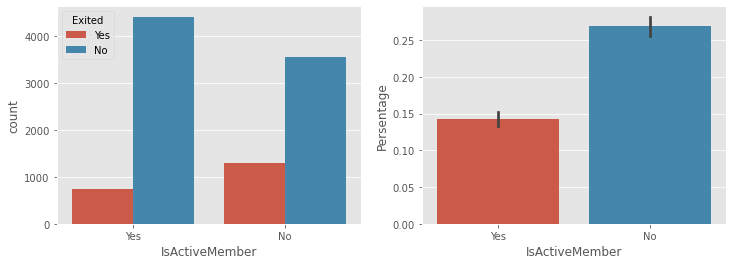

In [11]:
# 類別變數繪圖 (countplot, barplot) -- IsActiveMember
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x='IsActiveMember', data=shrutime_df, hue="Exited", ax=axes[0])
ax2 = sns.barplot(x='IsActiveMember', y='Exited_n', data=shrutime_df, ax=axes[1])
ax2.set_ylabel('Persentage')
plt.show()

<font color=#00008b size=5 face="黑體">**量化資料繪圖**</font>

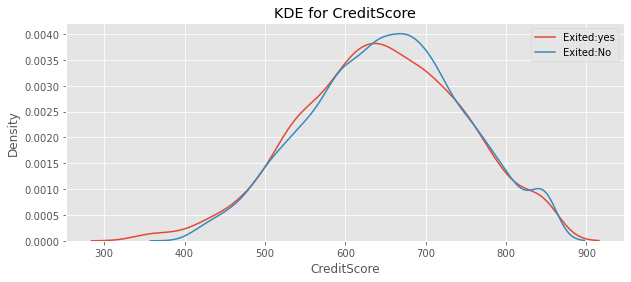

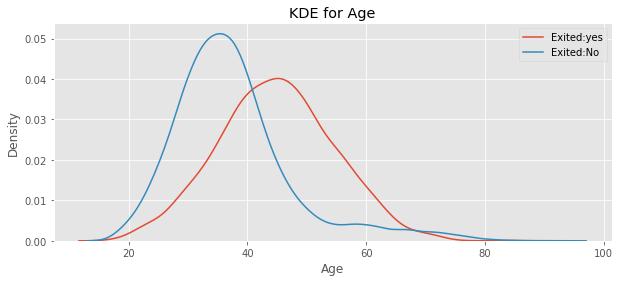

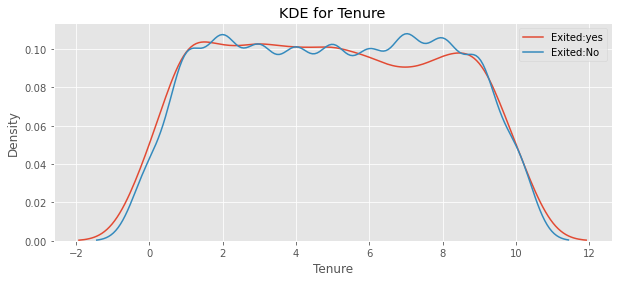

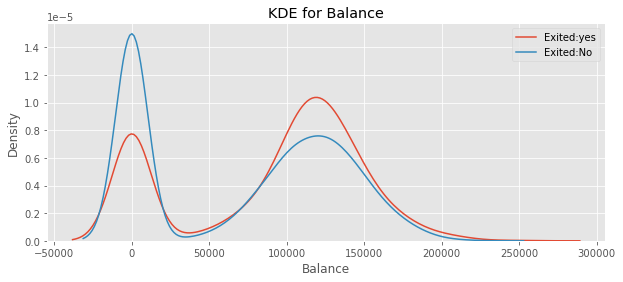

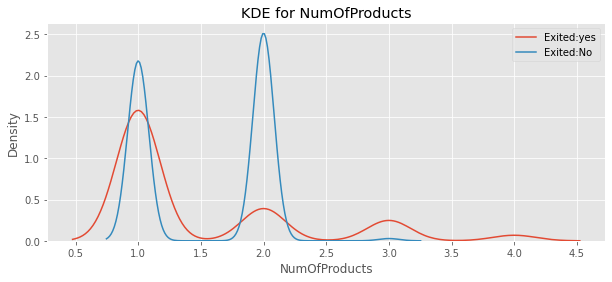

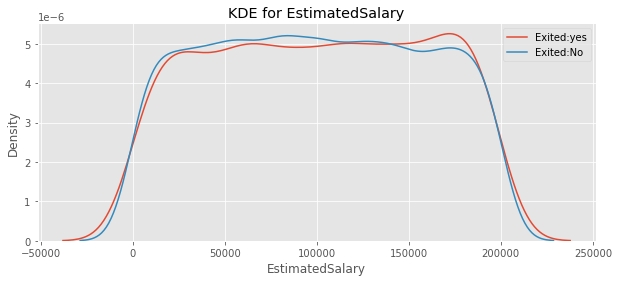

In [21]:
# 量化變數繪圖 (KDE plot)
for feature in shrutime_quantitative.columns:
    plt.figure(figsize=(10,4))
    plt.title("KDE for {}".format(feature))
    sns.kdeplot(shrutime_pos[feature], label='Exited:yes')
    sns.kdeplot(shrutime_neg[feature], label='Exited:No')
    plt.legend()
    plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# 區分連續與量化資料
shrutime_categorial, shrutime_quantitative = split_data_by_feature_types(shrutime_df)

shrutime_X = shrutime_df.drop(columns=["Exited", "Exited_n"])
shrutime_y_f = ["Exited"] #目標變數
cat_cols   = shrutime_categorial.columns.drop("Exited")  #類別變數
num_cols   = shrutime_quantitative.columns.drop("Exited_n")  #數值變數
bin_cols   = shrutime_X.nunique()[shrutime_X.nunique() == 2].keys().tolist()  #二元變數
multi_cols = [i for i in cat_cols if i not in bin_cols]  #多元變數

#對二元變數編碼
encoder = LabelEncoder()
for i in bin_cols :
    shrutime_X[i] = encoder.fit_transform(shrutime_X[i])
    
#對多元變數編碼
shrutime_X = pd.get_dummies(data = shrutime_X, columns = multi_cols)

#標準化數值變數
std = StandardScaler()
shrutime_X[num_cols] = std.fit_transform(shrutime_X[num_cols])

In [26]:
plt.figure(figsize=(20, 20))
corr = shrutime_X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,mask=mask, yticklabels=corr.columns, square=True,
                  linewidths=.2, cmap="YlGnBu",annot=True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000267A7E92940> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

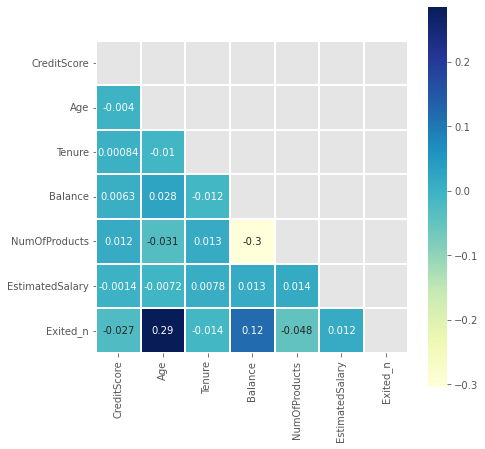

In [22]:
plt.figure(figsize=(7, 7))
corr = shrutime_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,mask=mask, yticklabels=corr.columns, square=True,
                  linewidths=.2, cmap="YlGnBu",annot=True)